In [39]:
import os, sys
sys.path.insert(0, os.path.abspath("Code"))
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from gibbsrank import gibbs_sample
import pandas as pd

Gibbs Ranking, Burn-in, and Autocovariance

100%|██████████| 1400/1400 [00:08<00:00, 158.71it/s]


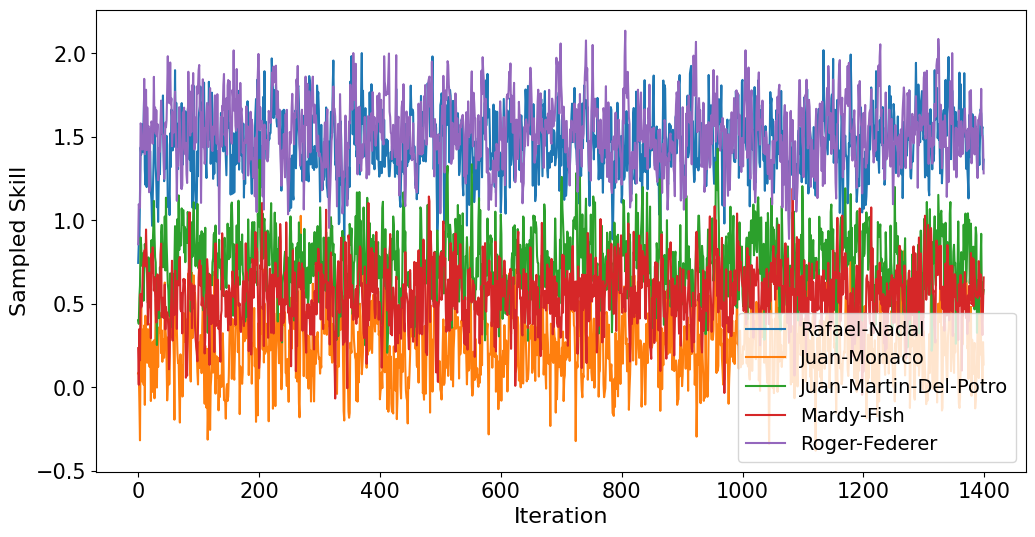

In [40]:
np.random.seed(0)  # set seed
data = sio.loadmat('Code/tennis_data.mat') # load data
W = data['W'] # Array containing the names of each player
W = W[:,0]

# Array size = num_games x 2. The first entry in each row is the winner of game i, the second is the loser
G = data['G'] - 1
# Number of players and games
M = W.shape[0]
N = G.shape[0]

# Number of iterations
num_iters = 1400
# Perform Gibbs sampling
skill_samples = gibbs_sample(G, M, num_iters)

# Player indices to plot
players_to_plot = [0, 1, 2, 3, 4]
player_names = [W[p] for p in players_to_plot]

# Plot the sampled skills for each player
plt.figure(figsize=(12, 6))

for idx, p in enumerate(players_to_plot):
    plt.plot(skill_samples[p, :], label=player_names[idx])

plt.legend(fontsize = 14)
plt.xlabel('Iteration', fontsize = 16)
plt.ylabel('Sampled Skill', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()


Autocovariance vs Lags Plot

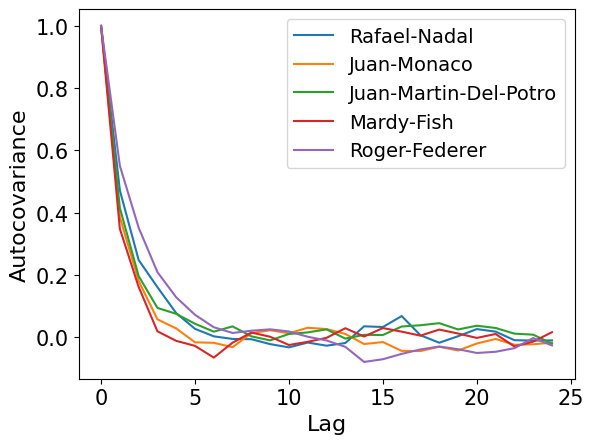

In [41]:
# Number of lags to compute autocorrelation for
num_lags = 25
for p in range(5):
    autocor = np.zeros(num_lags)
    # Compute autocorrelation for each lag
    for lag in range(num_lags):
        autocor[lag] = pd.Series.autocorr(pd.Series(skill_samples[p, :]), lag=lag)
    # Plot autocorrelation for player p
    plt.plot(range(num_lags), autocor, label=W[p])
plt.xlabel('Lag', fontsize = 16)
plt.ylabel('Autocovariance', fontsize = 16)
plt.legend(fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()


Plot for convergence of mean and standard deviation

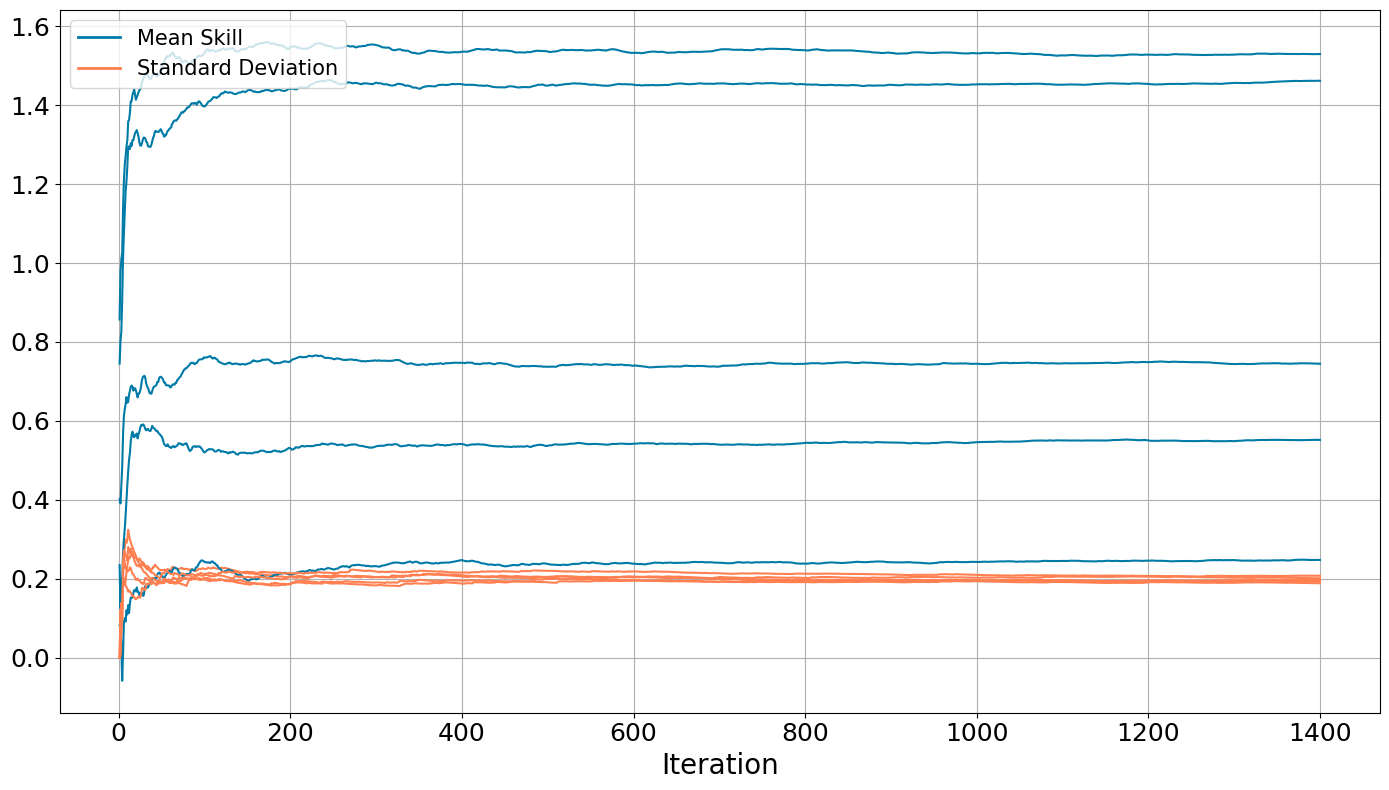

In [42]:
plt.figure(figsize=(14, 8))
for player_index in players_to_plot:
    player_samples = skill_samples[player_index, :]

    # Compute cumulative mean and standard deviation
    cum_sum = np.cumsum(player_samples)
    cum_sum_sq = np.cumsum(player_samples ** 2)
    n = np.arange(1, num_iters + 1)
    cum_mean = cum_sum / n
    cum_var = (cum_sum_sq / n) - cum_mean ** 2
    cum_std = np.sqrt(cum_var)

    # Plot cumulative mean
    plt.plot(n, cum_mean, color='#007BA7')
    # Plot cumulative standard deviation
    plt.plot(n, cum_std, color='#FF7F50')

mean_proxy = Line2D([0], [0], color='#007BA7', linewidth=2, label='Mean Skill')
std_proxy = Line2D([0], [0], color='#FF7F50', linewidth=2, label='Standard Deviation')
plt.legend(handles=[mean_proxy, std_proxy], fontsize=15, loc='upper left')
plt.xlabel('Iteration', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()

Convergence for Gibbs Sampling and Message Passing Algorithms

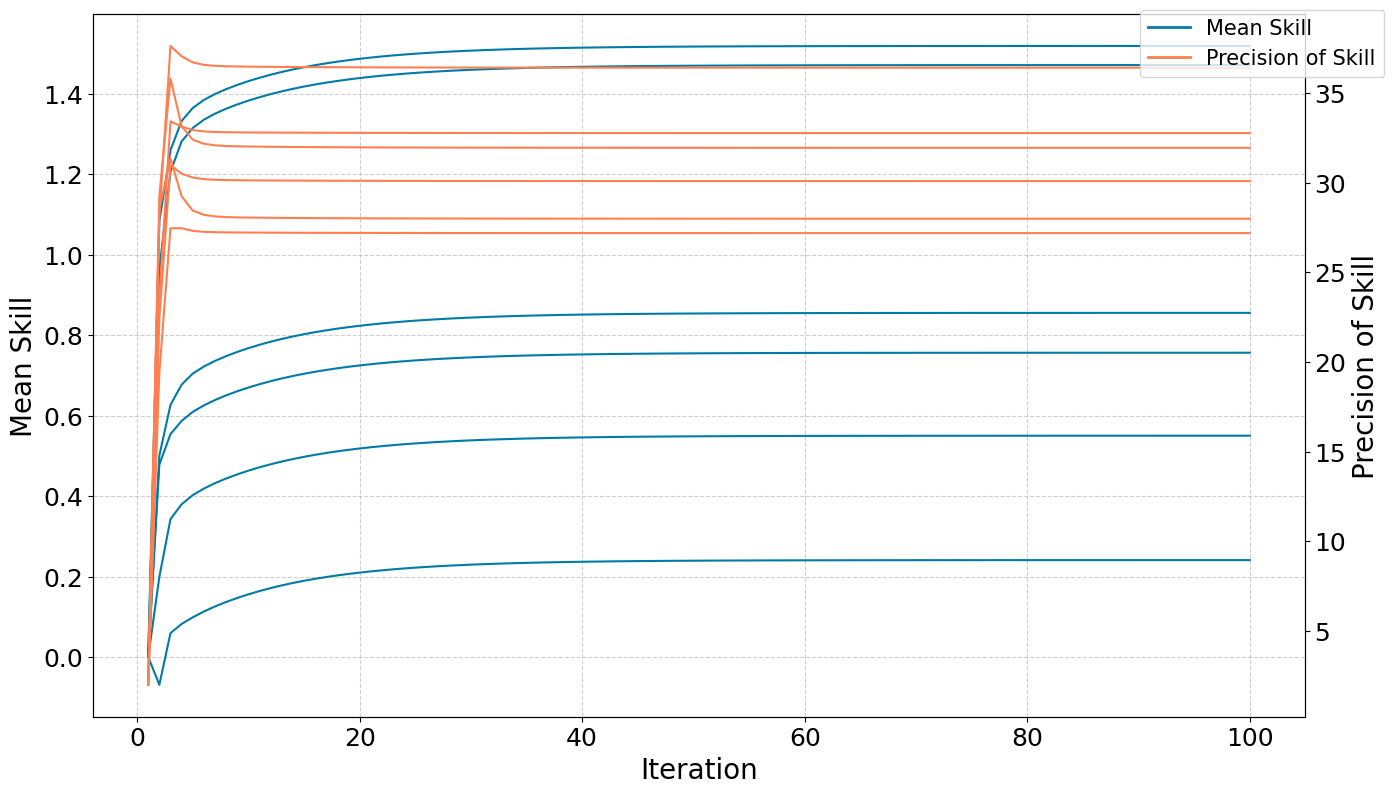

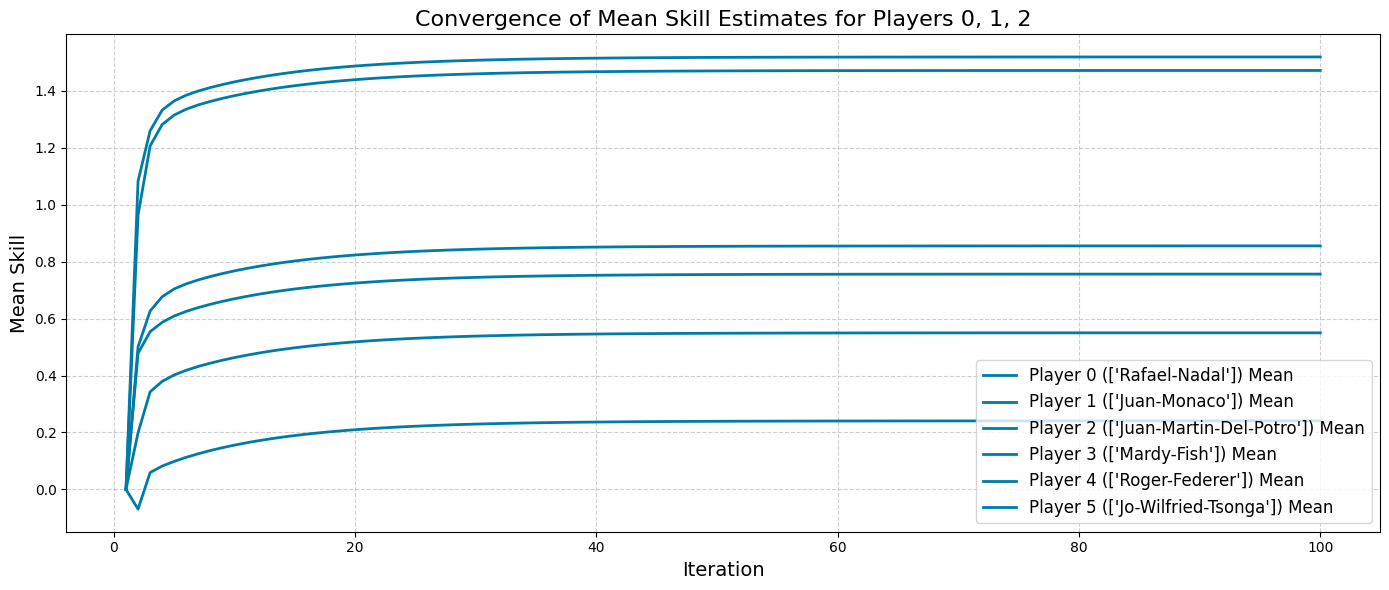

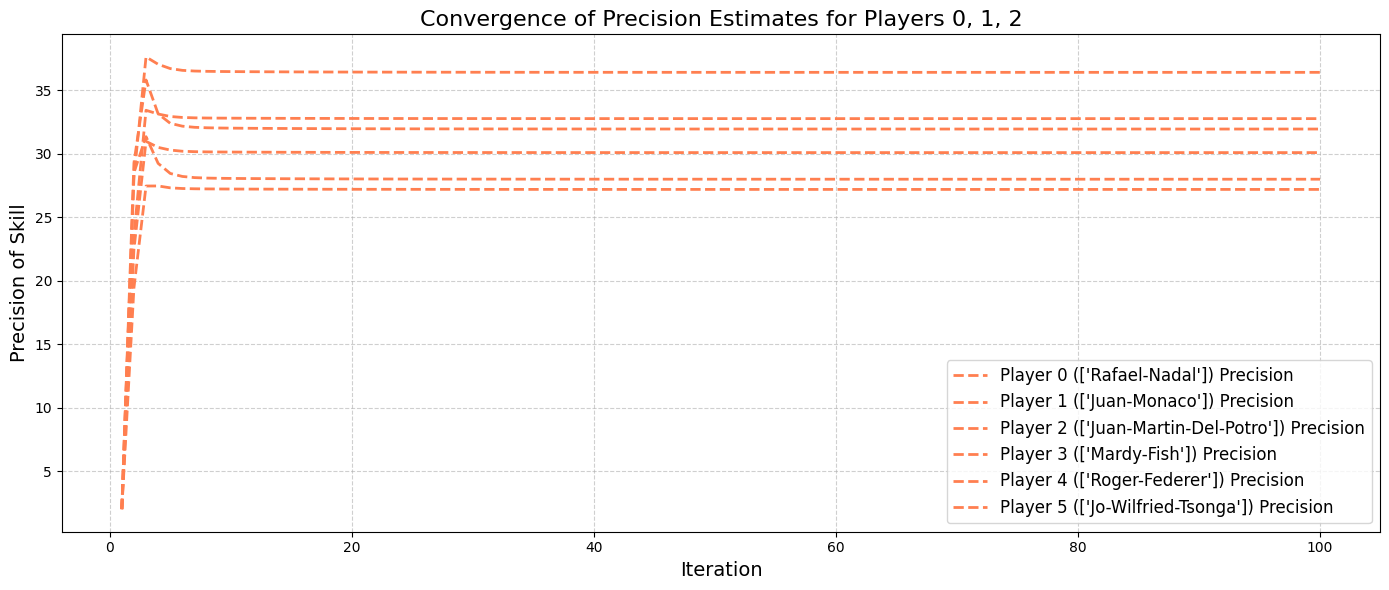

In [43]:
from eprank_convergence import eprank_convergence

np.random.seed(0)
M = W.shape[0]
N = G.shape[0]

# Number of iterations for EP
num_iters = 100
mean_player_skills, precision_player_skills = eprank_convergence(G, M, num_iters)
players_to_plot = [0, 1, 2, 3, 4, 5]
player_names = [W[p] for p in players_to_plot]
iterations = np.arange(1, num_iters + 1)

# Figure and primary axis for Mean Skill
fig, ax1 = plt.subplots(figsize=(14, 8))
mean_color = '#007BA7'
precision_color = '#FF7F50'

# Plot Mean Skill for each player on the primary y-axis
for idx, p in enumerate(players_to_plot):
    ax1.plot(iterations, mean_player_skills[:, p], color=mean_color, linewidth=1.5)
# Set labels and title for the primary y-axis
ax1.set_xlabel('Iteration', fontsize=20)
ax1.set_ylabel('Mean Skill', fontsize=20)
ax1.tick_params(labelsize=18)

# Secondary axis
ax2 = ax1.twinx()
# Plot Precision of Skill for each player on the secondary y-axis
for idx, p in enumerate(players_to_plot):
    ax2.plot(iterations, precision_player_skills[:, p], color=precision_color, linewidth=1.5)
# Set labels and title for the secondary y-axis
ax2.set_ylabel('Precision of Skill', fontsize=20)
ax2.tick_params(labelsize = 18)
mean_proxy = Line2D([0], [0], color=mean_color, linewidth=2, label='Mean Skill')
precision_proxy = Line2D([0], [0], color=precision_color, linewidth=2, label='Precision of Skill')
fig.legend(handles=[mean_proxy, precision_proxy], fontsize=15, loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot convergence of Mean Skill for each player
plt.figure(figsize=(14, 6))
for idx, p in enumerate(players_to_plot):
    plt.plot(iterations, mean_player_skills[:, p], label=f'Player {p} ({player_names[idx]}) Mean', color=mean_color, linewidth=2)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Mean Skill', fontsize=14)
plt.title('Convergence of Mean Skill Estimates for Players 0, 1, 2', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot convergence of Precision of Skill for each player
plt.figure(figsize=(14, 6))
for idx, p in enumerate(players_to_plot):
    plt.plot(iterations, precision_player_skills[:, p], label=f'Player {p} ({player_names[idx]}) Precision', linestyle='--', color=precision_color, linewidth=2)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Precision of Skill', fontsize=14)
plt.title('Convergence of Precision Estimates for Players 0, 1, 2', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Skill Comparisons

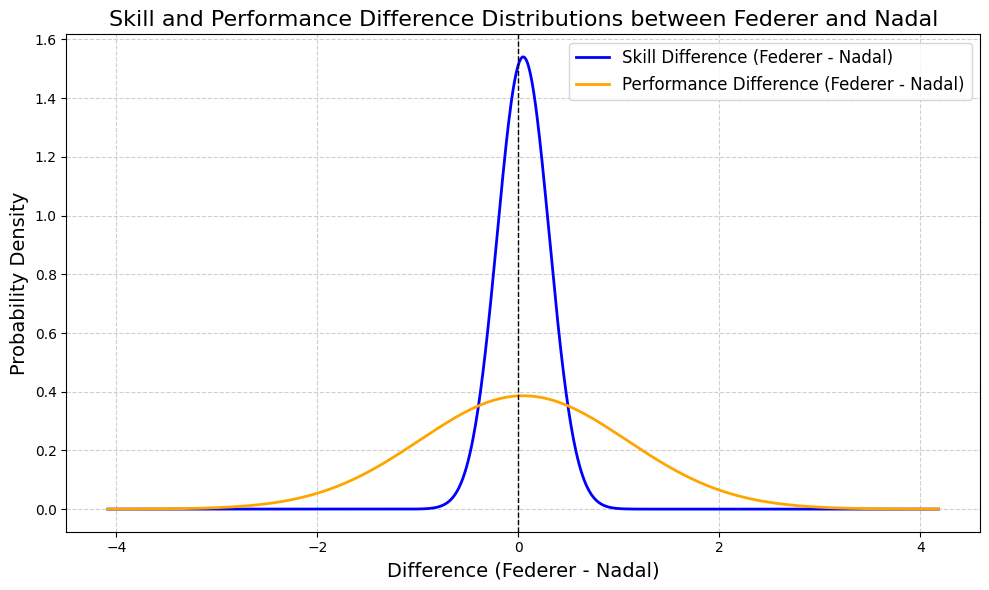

In [44]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from eprank import eprank 

specific_players = ['Roger Federer', 'Rafael Nadal']
player_indices = [4, 0]  # [Federer, Nadal]

# Run EP Algorithm
num_iters = 100  # Number of iterations for EP; adjust as needed
Ms, Ps = eprank(G, M, num_iters)

# Extract Means and Precisions for the Players
M1 = Ms[player_indices[0]]  # Mean skill for Roger Federer
P1 = Ps[player_indices[0]]  # Precision for Roger Federer
M2 = Ms[player_indices[1]]  # Mean skill for Rafael Nadal
P2 = Ps[player_indices[1]]  # Precision for Rafael Nadal

# Compute Skill Difference Distribution
delta_M_skill = M1 - M2
delta_var_skill = (1 / P1) + (1 / P2)
skill_diff_mean = delta_M_skill
skill_diff_std = np.sqrt(delta_var_skill)

# Compute Performance Difference Distribution
# Performance difference includes an additional noise term with variance sigma_squared = 1
sigma_squared = 1
delta_var_perf = delta_var_skill + sigma_squared
perf_diff_mean = delta_M_skill
perf_diff_std = np.sqrt(delta_var_perf)

# Define Range for x-axis
# Define the range to cover most of the distributions (e.g., mean ± 4*std)
x_min = min(skill_diff_mean - 4 * skill_diff_std, perf_diff_mean - 4 * perf_diff_std)
x_max = max(skill_diff_mean + 4 * skill_diff_std, perf_diff_mean + 4 * perf_diff_std)
x = np.linspace(x_min, x_max, 1000)

# Compute PDF Values
skill_diff_pdf = norm.pdf(x, loc=skill_diff_mean, scale=skill_diff_std)
perf_diff_pdf = norm.pdf(x, loc=perf_diff_mean, scale=perf_diff_std)

# Plotting
plt.figure(figsize=(10, 6))
# Plot Skill Difference Distribution
plt.plot(x, skill_diff_pdf, label='Skill Difference (Federer - Nadal)', color='blue', linewidth=2)
# Plot Performance Difference Distribution
plt.plot(x, perf_diff_pdf, label='Performance Difference (Federer - Nadal)', color='orange', linewidth=2)
# Add vertical line at x=0
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
# Add labels and title
plt.xlabel('Difference (Federer - Nadal)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Skill and Performance Difference Distributions between Federer and Nadal', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()



100%|██████████| 2200/2200 [00:13<00:00, 160.35it/s]


Method 1 (Marginal Gaussian Approximation):
P(Nadal's skill > Federer's skill) = 0.4049

Method 2 (Joint Gaussian Approximation):
P(Nadal's skill > Federer's skill) = 0.3978

Comparison of Methods:
Method 1 Probability: 0.4049
Method 2 Probability: 0.3978
Skill Probability Matrix (Rows: Players have higher skill than Columns) using Method 2:
Players: ['Novak-Djokovic', 'Rafael-Nadal', 'Roger-Federer', 'Andy-Murray']
[[0.5    0.9562 0.9148 0.989 ]
 [0.0438 0.5    0.3978 0.7751]
 [0.0852 0.6022 0.5    0.8209]
 [0.011  0.2249 0.1791 0.5   ]]

Skill Probability Matrix (Rows: Players have higher skill than Columns) using EP Algorithm:
Players: ['Novak-Djokovic', 'Rafael-Nadal', 'Roger-Federer', 'Andy-Murray']
[[0.5    0.9398 0.9089 0.9853]
 [0.0602 0.5    0.4272 0.7665]
 [0.0911 0.5728 0.5    0.8108]
 [0.0147 0.2335 0.1892 0.5   ]]


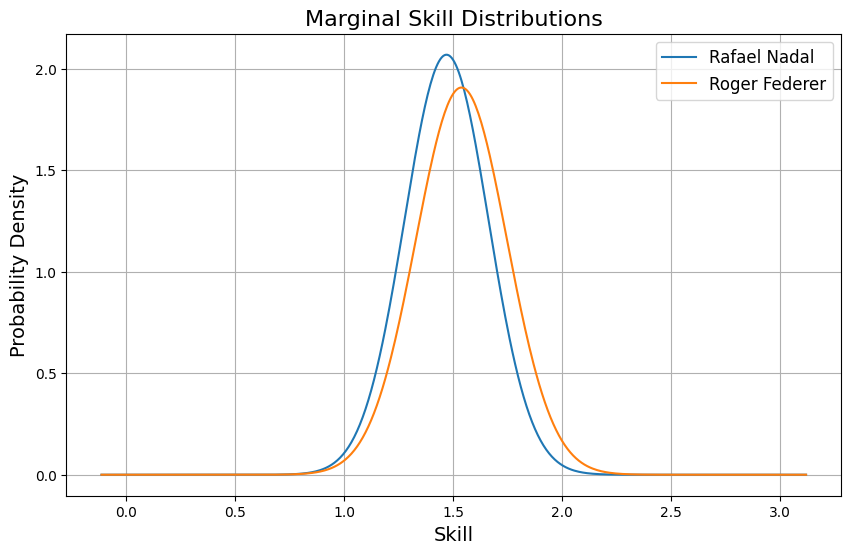

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from gibbsrank import gibbs_sample
from eprank import eprank

np.random.seed(0)
# Convert W to a list of player names for easier access
player_names = [W[i] for i in range(M)]
# Set the number of iterations for Gibbs sampling
burn_in = 200
autocorrelation_time = 5
num_independent_samples = 400  # Adjust as needed
total_iterations = burn_in + num_independent_samples * autocorrelation_time

# Run Gibbs sampling
skill_samples_full = gibbs_sample(G, M, total_iterations)

# Discard burn-in samples and thin the chain to obtain approximately independent samples
skill_samples = skill_samples_full[:, burn_in::autocorrelation_time]

# Get player indices for Rafael Nadal and Roger Federer
nadal_index = player_names.index('Rafael-Nadal')
federer_index = player_names.index('Roger-Federer')

# Get samples for each player
nadal_samples = skill_samples[nadal_index, :]
federer_samples = skill_samples[federer_index, :]

# Approximating marginal skills by Gaussians
# Compute marginal means and standard deviations
nadal_mean = np.mean(nadal_samples)
nadal_std = np.std(nadal_samples)
federer_mean = np.mean(federer_samples)
federer_std = np.std(federer_samples)

# Compute probability that Nadal's skill > Federer's skill
mean_diff = nadal_mean - federer_mean
var_diff = nadal_std**2 + federer_std**2
prob_nadal_better_marginal = 1 - norm.cdf(0, loc=mean_diff, scale=np.sqrt(var_diff))
print("Method 1 (Marginal Gaussian Approximation):")
print(f"P(Nadal's skill > Federer's skill) = {prob_nadal_better_marginal:.4f}\n")

# Approximating joint skills by a Gaussian
# Compute mean vector and covariance matrix for Nadal and Federer
mean_vector = np.array([nadal_mean, federer_mean])
cov_matrix = np.cov(np.vstack((nadal_samples, federer_samples)))

# Compute probability that Nadal's skill > Federer's skill
mu_diff = mean_vector[0] - mean_vector[1]
var_diff = cov_matrix[0, 0] + cov_matrix[1, 1] - 2 * cov_matrix[0, 1]
prob_nadal_better_joint = 1 - norm.cdf(0, loc=mu_diff, scale=np.sqrt(var_diff))
print("Method 2 (Joint Gaussian Approximation):")
print(f"P(Nadal's skill > Federer's skill) = {prob_nadal_better_joint:.4f}\n")

# Determine which method is best
print("Comparison of Methods:")
print(f"Method 1 Probability: {prob_nadal_better_marginal:.4f}")
print(f"Method 2 Probability: {prob_nadal_better_joint:.4f}")

# Compute the 4x4 skill probability table using Joint Gaussian Approximation
# Top four players: Djokovic, Nadal, Federer, Murray
top_players = ['Novak-Djokovic', 'Rafael-Nadal', 'Roger-Federer', 'Andy-Murray']
top_indices = [player_names.index(name) for name in top_players]
top_samples = skill_samples[top_indices, :]  # 4 x num_samples

# Compute mean vector and covariance matrix for top players
mean_vector = np.mean(top_samples, axis=1)
cov_matrix = np.cov(top_samples)
prob_matrix = np.zeros((4, 4))

# Compute probabilities using Method 2
for i in range(4):
    for j in range(4):
        if i != j:
            mu_diff = mean_vector[i] - mean_vector[j]
            var_diff = cov_matrix[i, i] + cov_matrix[j, j] - 2 * cov_matrix[i, j]
            prob_matrix[i, j] = 1 - norm.cdf(0, loc=mu_diff, scale=np.sqrt(var_diff))
        else:
            prob_matrix[i, j] = 0.5  # Equal probability when comparing the same player

# Print the probability matrix
print("Skill Probability Matrix (Rows: Players have higher skill than Columns) using Method 2:")
print("Players:", top_players)
print(np.round(prob_matrix, 4))

# Compare to message passing algorithm results
# Run EP ranking with 100 iterations
num_ep_iters = 100
ep_means, ep_precisions = eprank(G, M, num_ep_iters)

# Extract EP means and precisions for top players
ep_means_top = ep_means[top_indices]
ep_precisions_top = ep_precisions[top_indices]

# Compute EP skill probability matrix
ep_prob_matrix = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
        if i != j:
            mean_diff = ep_means_top[i] - ep_means_top[j]
            var_diff = 1.0 / ep_precisions_top[i] + 1.0 / ep_precisions_top[j]
            ep_prob_matrix[i, j] = 1 - norm.cdf(0, loc=mean_diff, scale=np.sqrt(var_diff))
        else:
            ep_prob_matrix[i, j] = 0.5

print("\nSkill Probability Matrix (Rows: Players have higher skill than Columns) using EP Algorithm:")
print("Players:", top_players)
print(np.round(ep_prob_matrix, 4))

x_values = np.linspace(
    min(nadal_samples.min(), federer_samples.min()) - 1,
    max(nadal_samples.max(), federer_samples.max()) + 1,
    500
)

plt.figure(figsize=(10, 6))
plt.plot(x_values, norm.pdf(x_values, nadal_mean, nadal_std), label='Rafael Nadal')
plt.plot(x_values, norm.pdf(x_values, federer_mean, federer_std), label='Roger Federer')
plt.xlabel('Skill', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Marginal Skill Distributions', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Compare ranking of Players using Predicted Outcomes


100%|██████████| 2200/2200 [00:13<00:00, 160.16it/s]


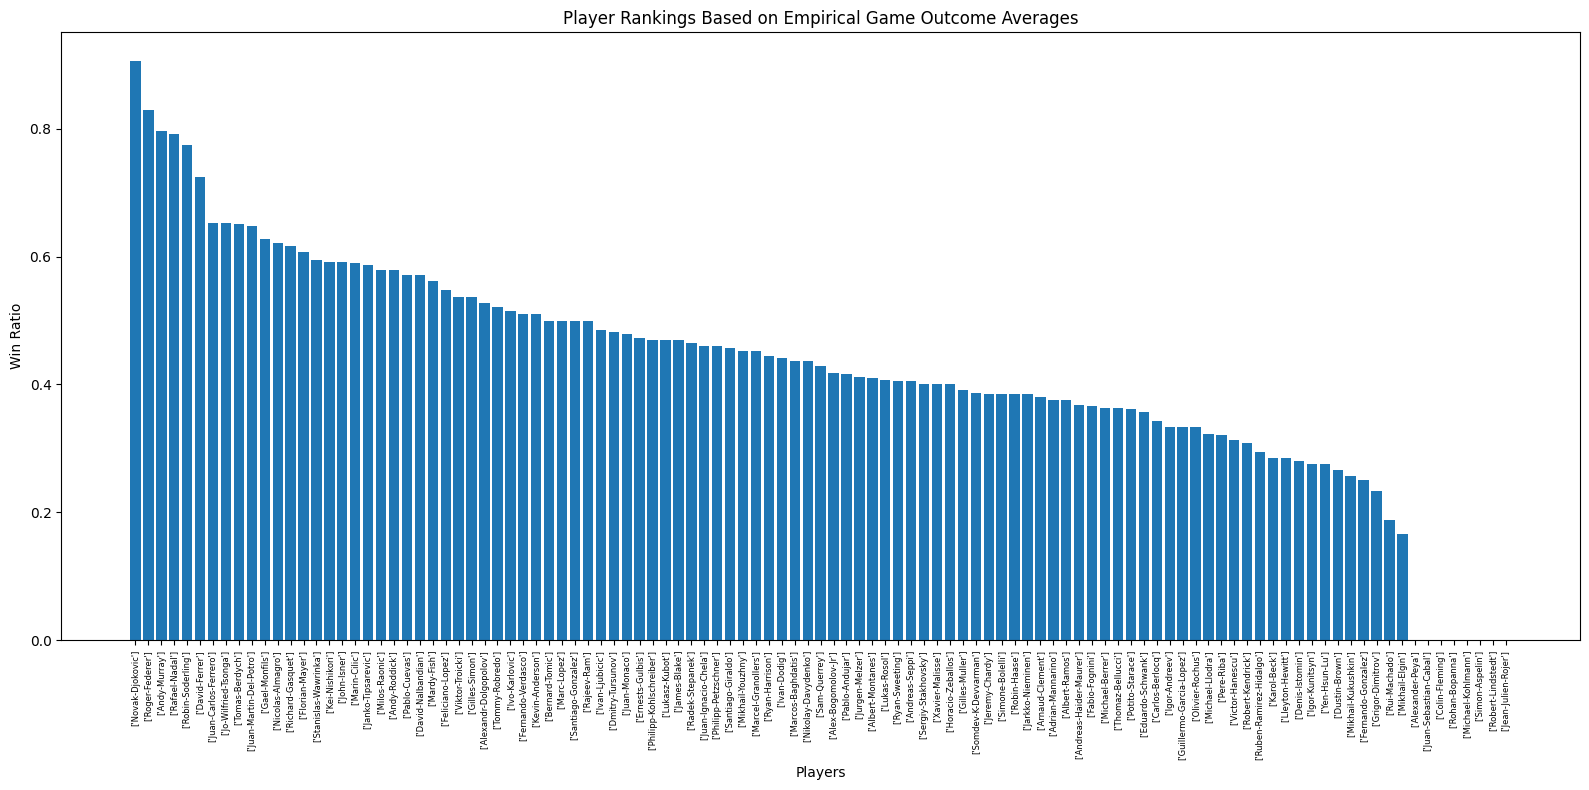

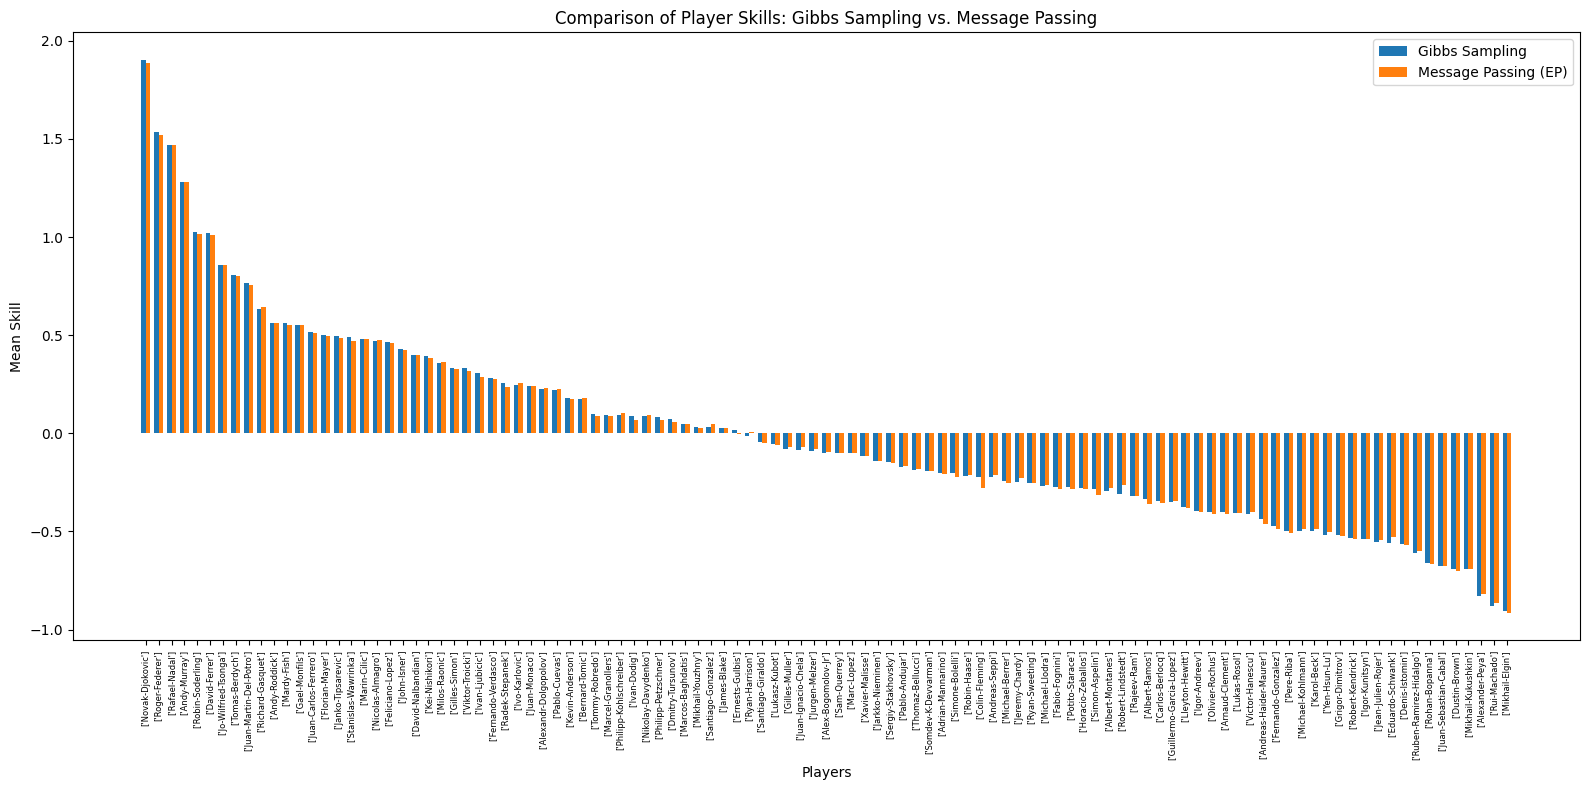

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from gibbsrank import gibbs_sample
from eprank import eprank

np.random.seed(0)
player_names = [W[i] for i in range(M)]

# Empirical Game Outcome Averages
wins = np.zeros(M)
losses = np.zeros(M)

for game in G:
    winner = game[0]
    loser = game[1]
    wins[winner] += 1
    losses[loser] += 1

total_games = wins + losses
win_ratio = np.divide(wins, total_games, out=np.zeros_like(wins), where=total_games != 0)

# Predictions Based on Gibbs Sampling
burn_in = 200
autocorrelation_time = 5
num_independent_samples = 400
total_iterations = burn_in + num_independent_samples * autocorrelation_time

skill_samples_full = gibbs_sample(G, M, total_iterations)
skill_samples = skill_samples_full[:, burn_in::autocorrelation_time]

# Compute the mean skill for each player
mean_skills_gibbs = np.mean(skill_samples, axis=1)

# Predictions Based on Message Passing Algorithm (EP)
num_ep_iters = 100
ep_means, ep_precisions = eprank(G, M, num_ep_iters)
mean_skills_ep = ep_means
non_zero_indices = np.where(win_ratio > 0)[0]
zero_indices = np.where(win_ratio == 0)[0]
sorted_non_zero_indices = non_zero_indices[np.argsort(-win_ratio[non_zero_indices])]
sorted_indices_empirical = np.concatenate([sorted_non_zero_indices, zero_indices])
sorted_player_names_empirical = [player_names[i] for i in sorted_indices_empirical]
sorted_win_ratio = win_ratio[sorted_indices_empirical]

# Plot 1: Empirical Game Outcome Averages for All Players
plt.figure(figsize=(16, 8))
x_emp = np.arange(len(sorted_win_ratio))
plt.bar(x_emp, sorted_win_ratio)

plt.xticks(x_emp, sorted_player_names_empirical, rotation=90, fontsize=6)
plt.xlabel('Players')
plt.ylabel('Win Ratio')
plt.title('Player Rankings Based on Empirical Game Outcome Averages')
plt.tight_layout()
plt.show()


sorted_indices_gibbs = np.argsort(-mean_skills_gibbs)
sorted_player_names = [player_names[i] for i in sorted_indices_gibbs]
sorted_mean_skills_gibbs = mean_skills_gibbs[sorted_indices_gibbs]
sorted_mean_skills_ep = mean_skills_ep[sorted_indices_gibbs]

# Plot 2: Comparison of Gibbs Sampling and Message Passing for All Players
x = np.arange(M)
width = 0.35

plt.figure(figsize=(16, 8))
plt.bar(x - width/2, sorted_mean_skills_gibbs, width, label='Gibbs Sampling')
plt.bar(x + width/2, sorted_mean_skills_ep, width, label='Message Passing (EP)')

plt.xticks(x, sorted_player_names, rotation=90, fontsize=6)
plt.xlabel('Players')
plt.ylabel('Mean Skill')
plt.title('Comparison of Player Skills: Gibbs Sampling vs. Message Passing')
plt.legend()
plt.tight_layout()
plt.show()
